In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf
import datetime

from valueinvesting import utils as utils

# 1. Load raw input
## Hardcoded block

In [2]:
evaluate_last_X_years = False
X=10
currency_pair = 'NOK=X'
numbers_in_currency = 'NOK'
share_name = 'ORK.OL'

# 1.2. Raw input statement data

In [3]:
route = f"../data/input/{share_name}_data.csv"
data = pd.read_csv(route, sep=';', parse_dates=['date', 'real_date'])
# replace -, extend missing 0-s, fix datatype
data = utils.replace_format_input(data)

In [4]:
owned_shares = pd.read_csv('../data/extras/owned_stocks.csv', sep=';', parse_dates=['date'])
owned_shares = owned_shares.loc[(owned_shares['stock'] == share_name) & (owned_shares['active'] == 'yes')]

## (OPTIONAL) Time Filtering - Last 7 years daat

In [5]:
if evaluate_last_X_years:
    data = data[data['date'] > datetime.datetime.today() - datetime.timedelta(days=X*366+93)]
    data = data.reset_index(drop=True)

data.head()

,date,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,curr_assets,goodwill,...,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,shares,real_date
0,2009-03-31,13448,-12597,921,-355,3761,11685,8637,34008,0,...,0,0,2659,14459,27977,47850,580,-325,1028.93,2009-05-05
1,2009-06-30,13652,-12731,921,243,3704,11465,8029,33353,0,...,0,0,3702,14184,28329,47604,1502,-305,1028.93,2009-07-14
2,2009-09-30,14088,-12661,1427,481,3865,10938,7580,32715,0,...,0,0,3499,13417,28755,47333,1863,-200,1028.93,2009-10-25
3,2009-12-31,13497,-11871,1626,1272,4153,16568,7531,39339,0,...,0,0,1746,12380,29042,46131,3030,-343,1028.93,2010-02-09
4,2010-03-31,14893,-13566,1327,-3612,3546,13300,8043,36629,0,...,0,0,2764,14177,22549,41233,250,-300,1028.93,2010-05-05


## Calculate date when quaterly reports could be available

In [6]:
data = utils.calculate_real_date(data)

# 2. Filter out unnecesary columns

In [7]:
data = utils.filter_raw_data(data)
data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,intangible_assets,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex
55,2022-12-31,2023-02-09,1001.43,16077,-13541,2536,1220,1502,7709,10359,...,33710,80671,8134,0,4127,17654,14975,38985,2053,-714
56,2023-03-31,2023-05-05,1001.43,16188,-13966,2222,1326,1315,9110,11574,...,36046,87631,8967,0,6101,20664,13518,42723,749,-736
57,2023-06-30,2023-07-14,1001.43,17087,-14660,2427,1427,1124,9093,11354,...,36522,88769,8336,0,5395,19216,17256,45071,1065,-690
58,2023-09-30,2023-10-25,1001.43,16783,-14225,2558,1618,1054,8984,10530,...,35604,86376,8403,0,5722,19437,14137,41891,2966,-578
59,2023-12-31,2024-02-09,1001.43,17739,-15368,2371,1050,991,8661,10135,...,35822,86592,8573,0,3315,17049,15663,41325,2469,-749


## Pull historical average USD national currency rates and add to the dataframe

In [8]:
data['usd_nat_currency'] = utils.daily_price(
    ticker=currency_pair,
    end=data['date'],
    days_earlier=90
    )

# drop rows, when USD rates wasn't available
data = data[data['usd_nat_currency'].notna()]

data.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
55,2022-12-31,2023-02-09,1001.43,16077,-13541,2536,1220,1502,7709,10359,...,80671,8134,0,4127,17654,14975,38985,2053,-714,10.186402
56,2023-03-31,2023-05-05,1001.43,16188,-13966,2222,1326,1315,9110,11574,...,87631,8967,0,6101,20664,13518,42723,749,-736,10.221379
57,2023-06-30,2023-07-14,1001.43,17087,-14660,2427,1427,1124,9093,11354,...,88769,8336,0,5395,19216,17256,45071,1065,-690,10.699984
58,2023-09-30,2023-10-25,1001.43,16783,-14225,2558,1618,1054,8984,10530,...,86376,8403,0,5722,19437,14137,41891,2966,-578,10.483742
59,2023-12-31,2024-02-09,1001.43,17739,-15368,2371,1050,991,8661,10135,...,86592,8573,0,3315,17049,15663,41325,2469,-749,10.821103


## Convert USD values related to IS, BS, CFS to national currency

In [9]:
# convert columns into national currency if necessary
if numbers_in_currency == 'USD':
    data_nat_curr = utils.convert_national_currency(input_data=data, currency=data)
else:
    data_nat_curr = data.copy()
data_nat_curr.tail()

,date,real_date,shares,revenue,cogs,gross_profit,net_profit,cash,acc_rec,inventory,...,total_assets,acc_pay,short_term_debt,current_debt,curr_liab,long_term_debt,total_liab,cash_from_operating_activities,capex,usd_nat_currency
55,2022-12-31,2023-02-09,1001.43,16077,-13541,2536,1220,1502,7709,10359,...,80671,8134,0,4127,17654,14975,38985,2053,-714,10.186402
56,2023-03-31,2023-05-05,1001.43,16188,-13966,2222,1326,1315,9110,11574,...,87631,8967,0,6101,20664,13518,42723,749,-736,10.221379
57,2023-06-30,2023-07-14,1001.43,17087,-14660,2427,1427,1124,9093,11354,...,88769,8336,0,5395,19216,17256,45071,1065,-690,10.699984
58,2023-09-30,2023-10-25,1001.43,16783,-14225,2558,1618,1054,8984,10530,...,86376,8403,0,5722,19437,14137,41891,2966,-578,10.483742
59,2023-12-31,2024-02-09,1001.43,17739,-15368,2371,1050,991,8661,10135,...,86592,8573,0,3315,17049,15663,41325,2469,-749,10.821103


# 3. Calculate input to Value Raios (eps, bv per share, fcf)
## filter out unwanted columns

In [10]:
filtered_nat_curr = utils.calculate_input_value_ratios(data_nat_curr)

## Calculate input values to value ratios

In [11]:
ratios_nat_curr = utils.ratios_input_filter(filtered_nat_curr)

In [12]:
ratios_nat_curr = utils.evaluate_performance(input=filtered_nat_curr, output=ratios_nat_curr)

# 4. Pull historical share prices and merge with sattement data
## Pull historical share prices

In [13]:
# pull weekly share prices and merge with the value ratios
merged_nat_curr = utils.add_share_prices_to_value_ratios(share_name, data, ratios_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,equity_ratio,debt_ratio,acc_rec_ratio,acc_pay_ratio,cash_turnover,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe
0,2009-05-11,22.059799,2009-03-31,13448.0,0.0,45.443325,1028.93,0.0,0.0,3761.0,...,0.494229,0.505771,0.0,0.0,0.0,0.0,0.068486,-0.026398,0.0,0.0
1,2009-05-18,23.886696,2009-03-31,13448.0,0.0,45.443325,1028.93,0.0,0.0,3761.0,...,0.494229,0.505771,0.0,0.0,0.0,0.0,0.068486,-0.026398,0.0,0.0
2,2009-05-25,23.521320,2009-03-31,13448.0,0.0,45.443325,1028.93,0.0,0.0,3761.0,...,0.494229,0.505771,0.0,0.0,0.0,0.0,0.068486,-0.026398,0.0,0.0
3,2009-06-01,22.585033,2009-03-31,13448.0,0.0,45.443325,1028.93,0.0,0.0,3761.0,...,0.494229,0.505771,0.0,0.0,0.0,0.0,0.068486,-0.026398,0.0,0.0
4,2009-06-08,22.265326,2009-03-31,13448.0,0.0,45.443325,1028.93,0.0,0.0,3761.0,...,0.494229,0.505771,0.0,0.0,0.0,0.0,0.068486,-0.026398,0.0,0.0


# Calculate price ratios (P/E, P/B, P/S, P/FCF)

In [14]:
merged_nat_curr = utils.price_ratios(merged_nat_curr)
merged_nat_curr.head()

,real_date,share_price,date,revenue,eps,bv_per_share,shares,fcf,fcf_per_share,cash,...,inventory_turnover,gross_profit_margin,net_profit_margin,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,pfcf_ratio
0,2009-05-11,22.059799,2009-03-31,13448.0,0.0,45.443325,1028.93,0.0,0.0,3761.0,...,0.0,0.068486,-0.026398,0.0,0.0,inf,0.485435,0.421958,1.241578,inf
1,2009-05-18,23.886696,2009-03-31,13448.0,0.0,45.443325,1028.93,0.0,0.0,3761.0,...,0.0,0.068486,-0.026398,0.0,0.0,inf,0.525637,0.456903,1.276523,inf
2,2009-05-25,23.521320,2009-03-31,13448.0,0.0,45.443325,1028.93,0.0,0.0,3761.0,...,0.0,0.068486,-0.026398,0.0,0.0,inf,0.517597,0.449914,1.269534,inf
3,2009-06-01,22.585033,2009-03-31,13448.0,0.0,45.443325,1028.93,0.0,0.0,3761.0,...,0.0,0.068486,-0.026398,0.0,0.0,inf,0.496993,0.432005,1.251625,inf
4,2009-06-08,22.265326,2009-03-31,13448.0,0.0,45.443325,1028.93,0.0,0.0,3761.0,...,0.0,0.068486,-0.026398,0.0,0.0,inf,0.489958,0.425890,1.245510,inf


# Calculate Dividend yield and currency-share price correlation

In [15]:
# get daily historical USD-national currency rates
usd_nat_curr = utils.get_historical_currency_rate(currency_pair, merged_nat_curr)

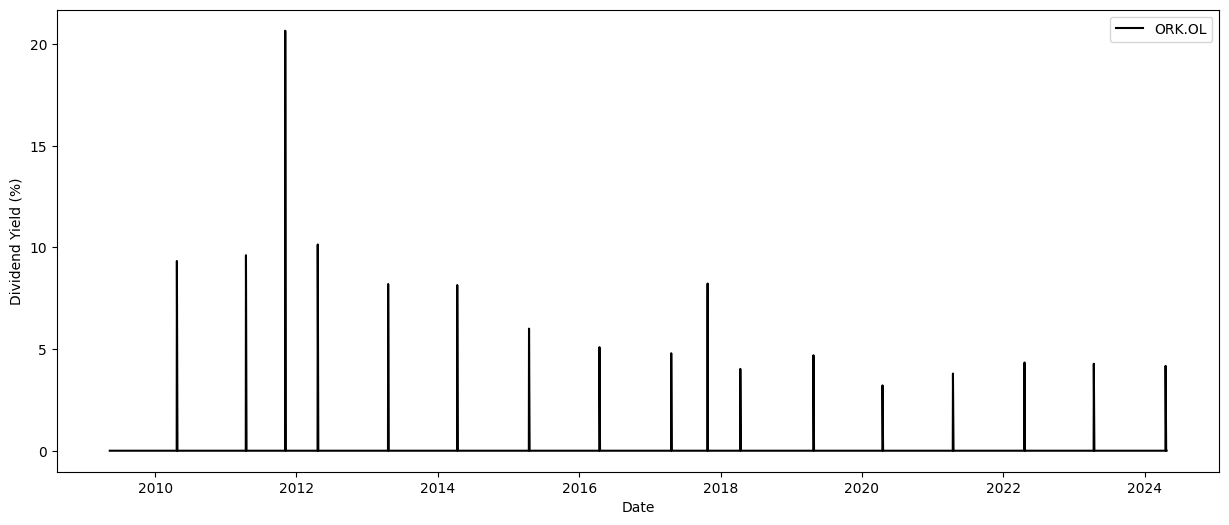

In [16]:
# get share prices and dividend yield data
ticker_all_price = utils.get_historical_share_dividend(share_name, merged_nat_curr)

currency_rate    0.917567
share_price      1.000000
Name: share_price, dtype: float64


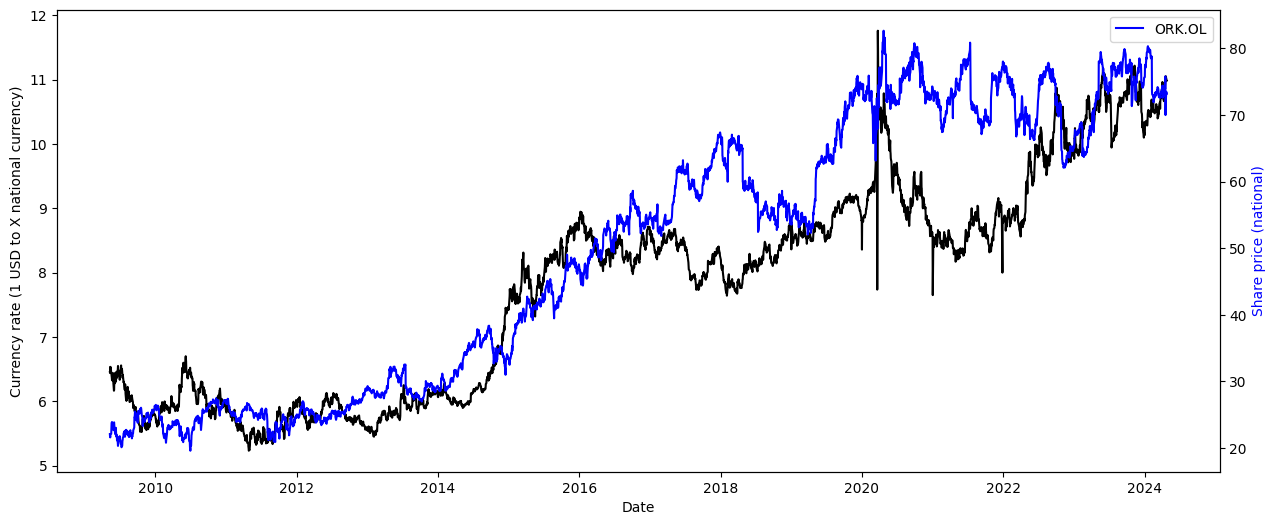

In [17]:
# Pearson's correlation coefficient between share price and USD - national currency rate
utils.get_currency_share_price_correlation(share_name, usd_nat_curr, ticker_all_price)

# Share price and value ratios

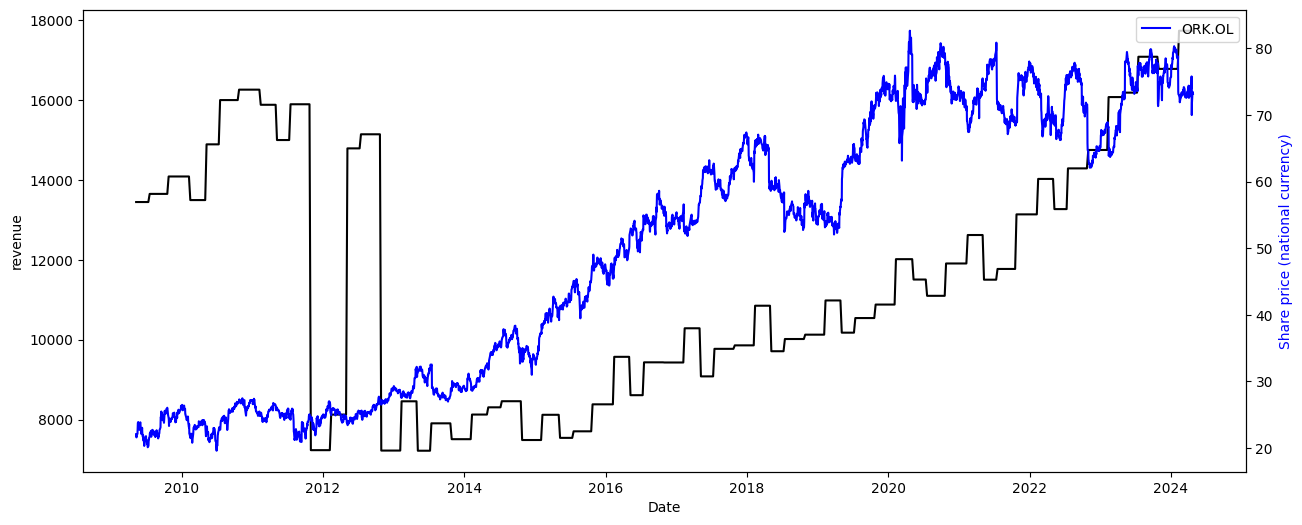

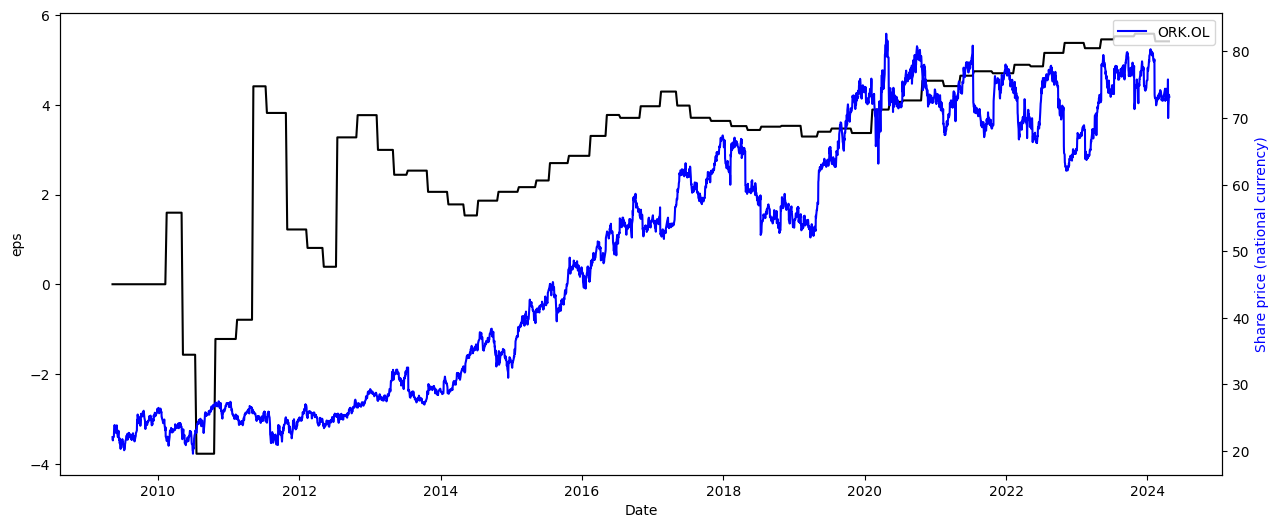

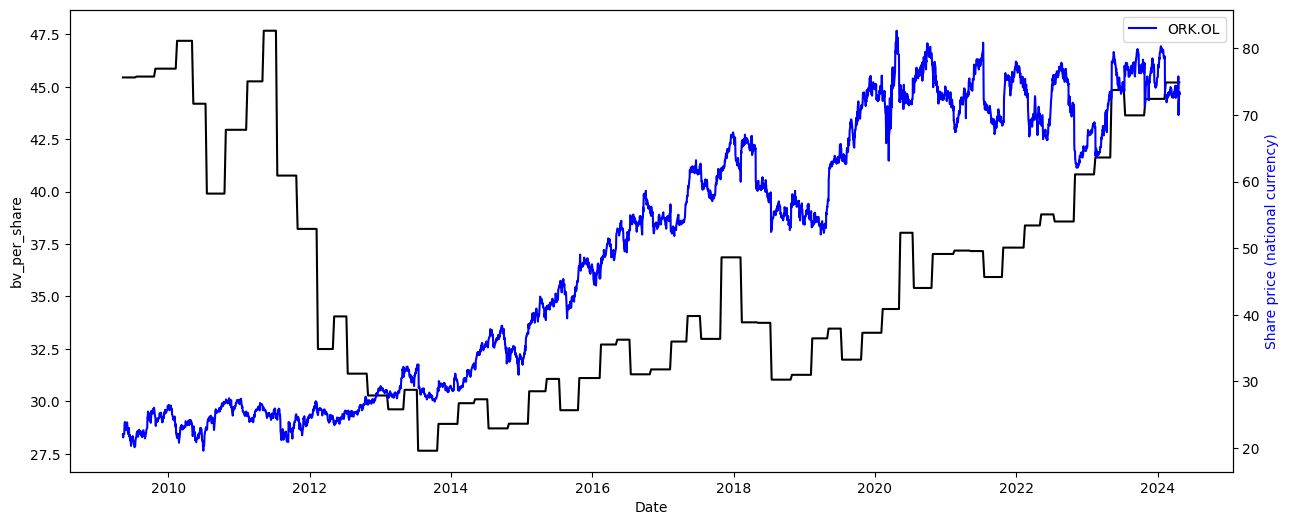

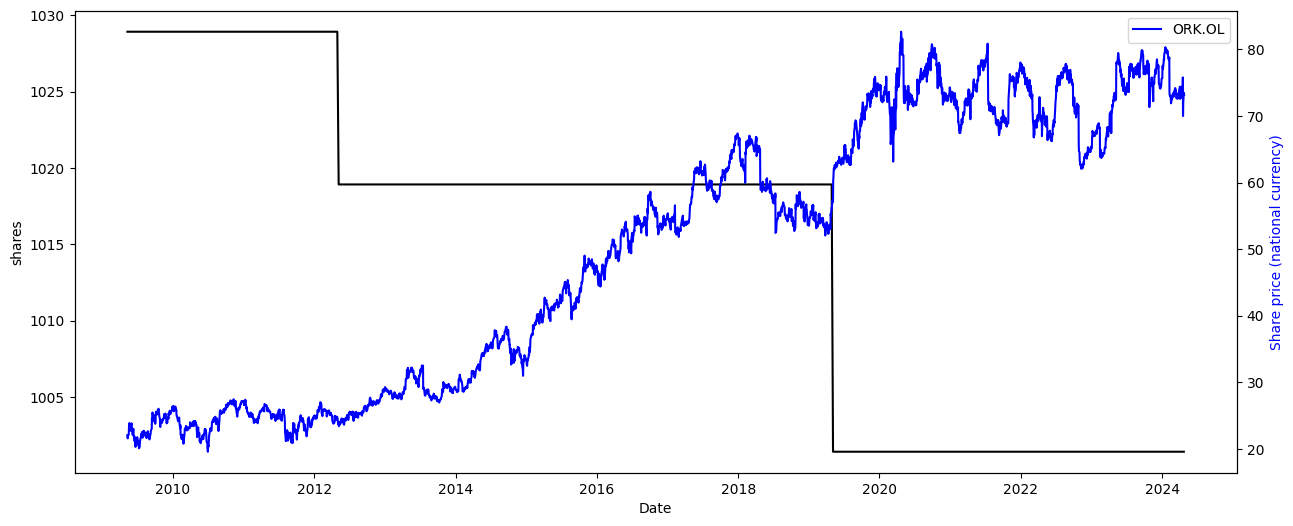

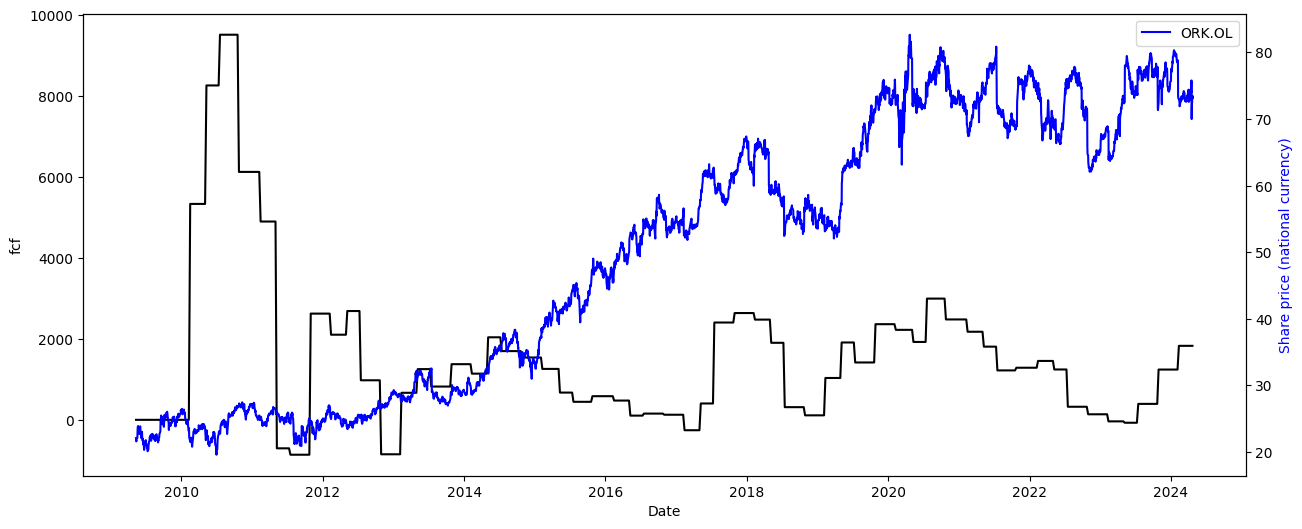

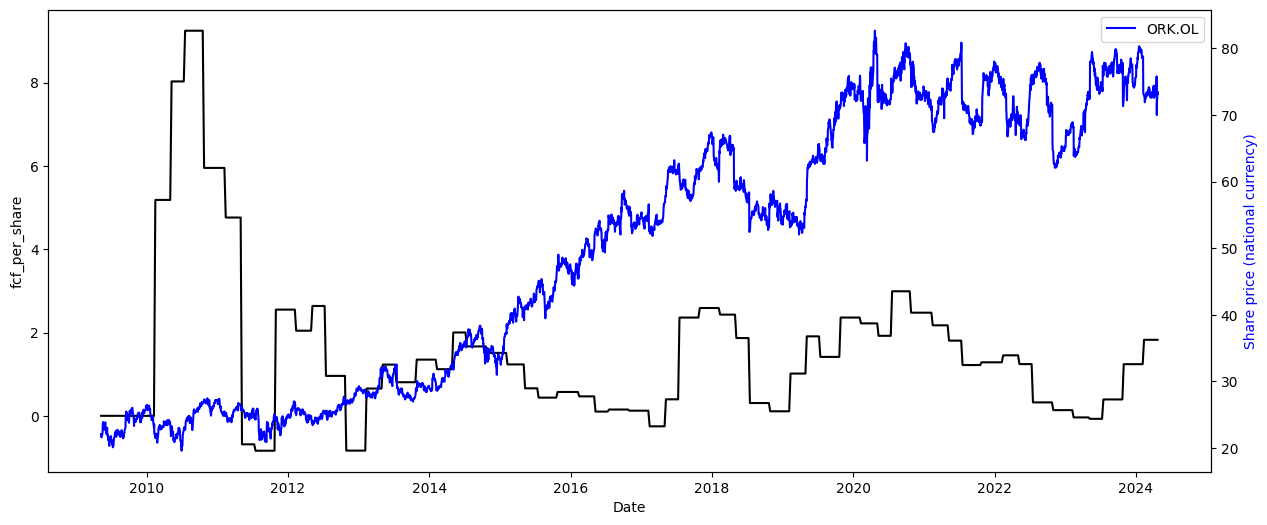

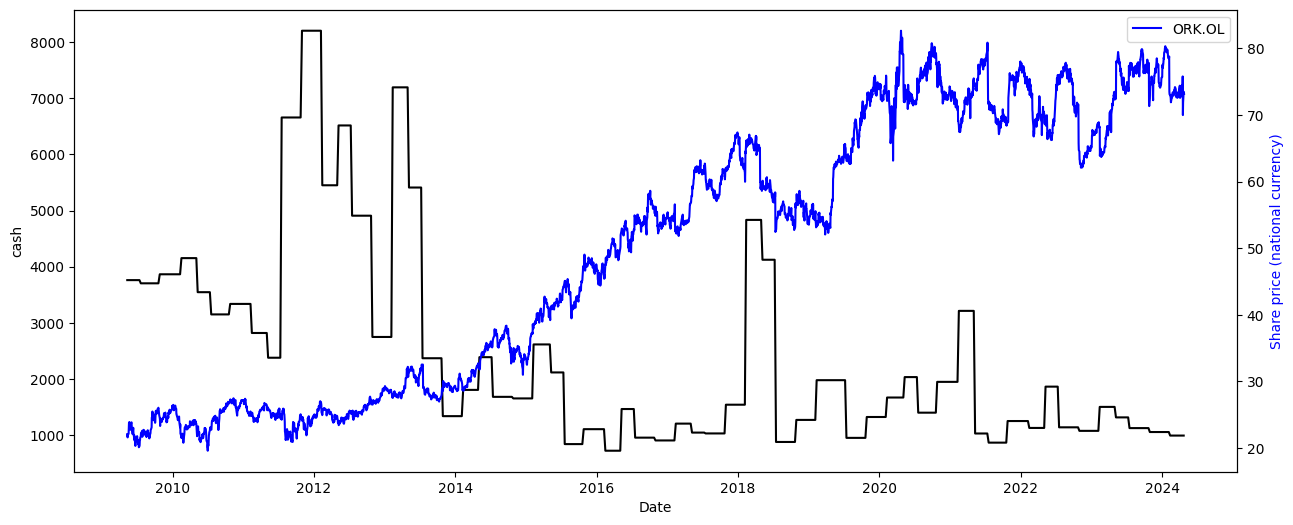

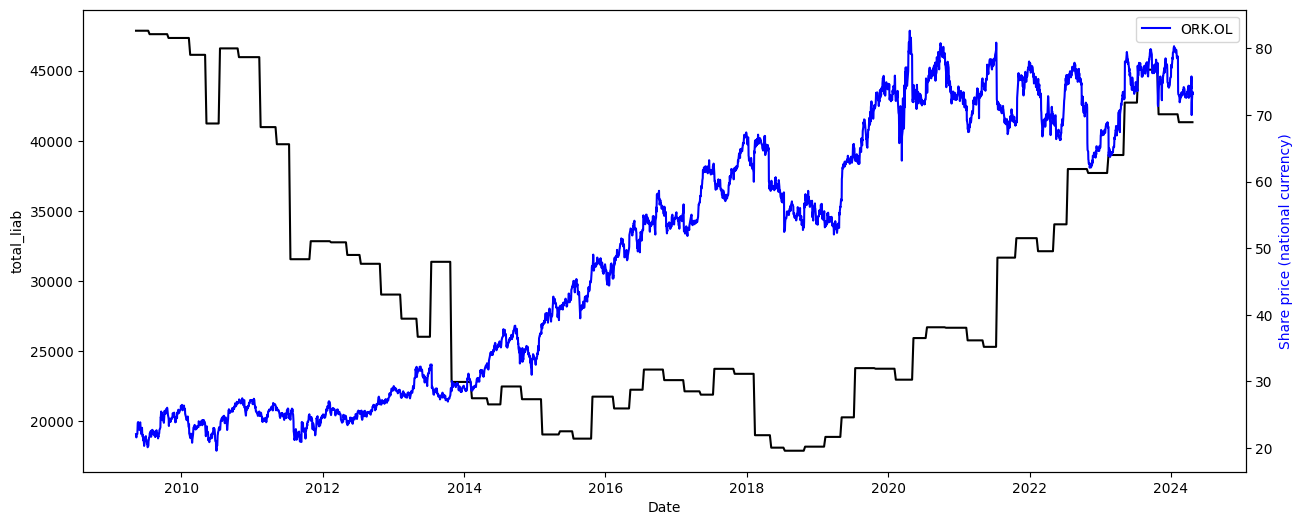

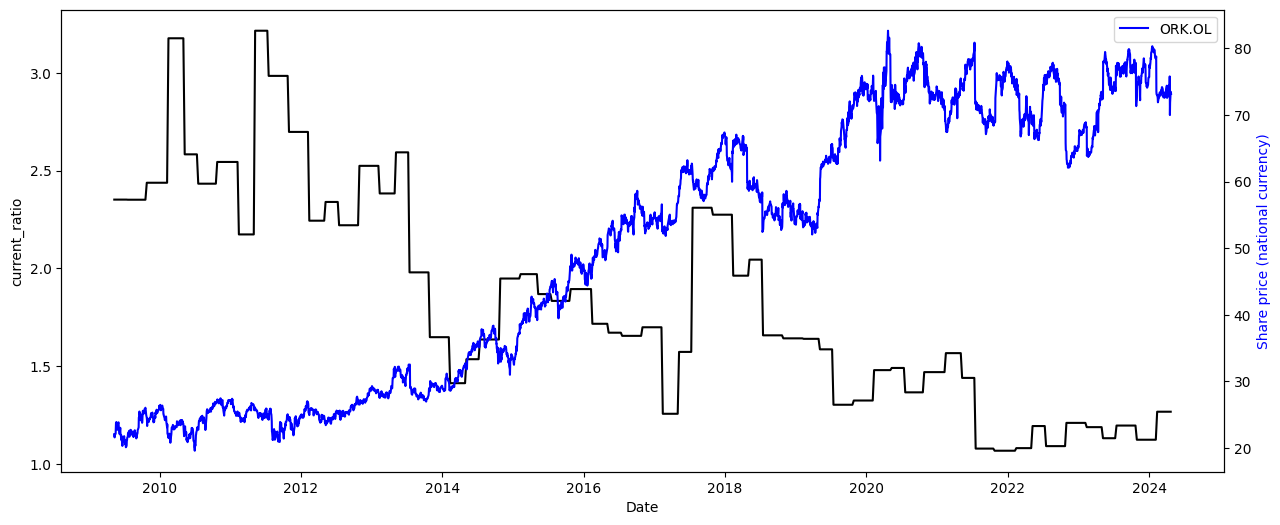

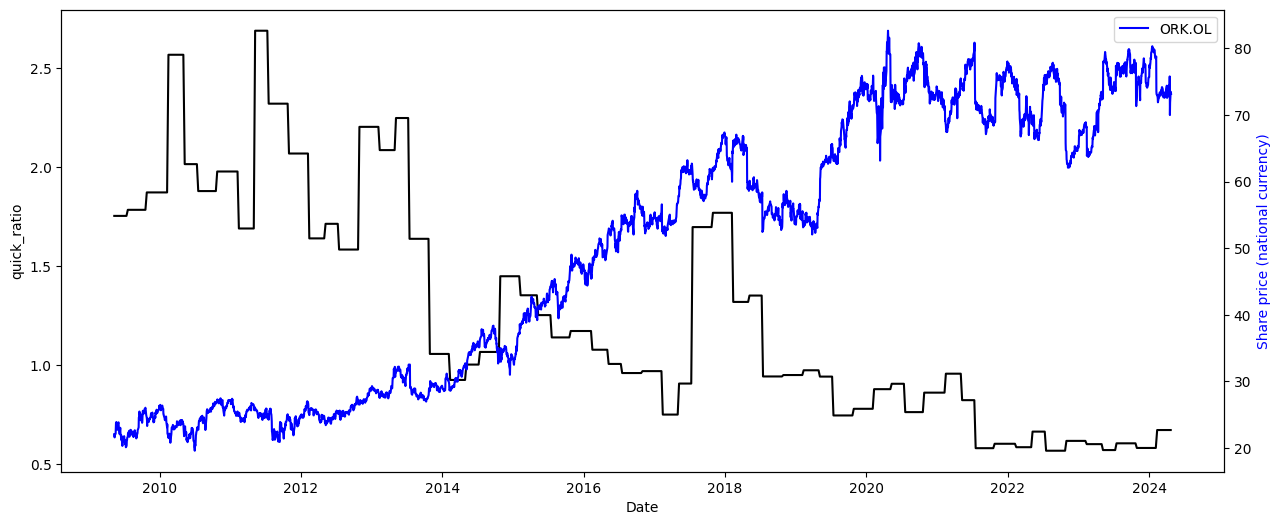

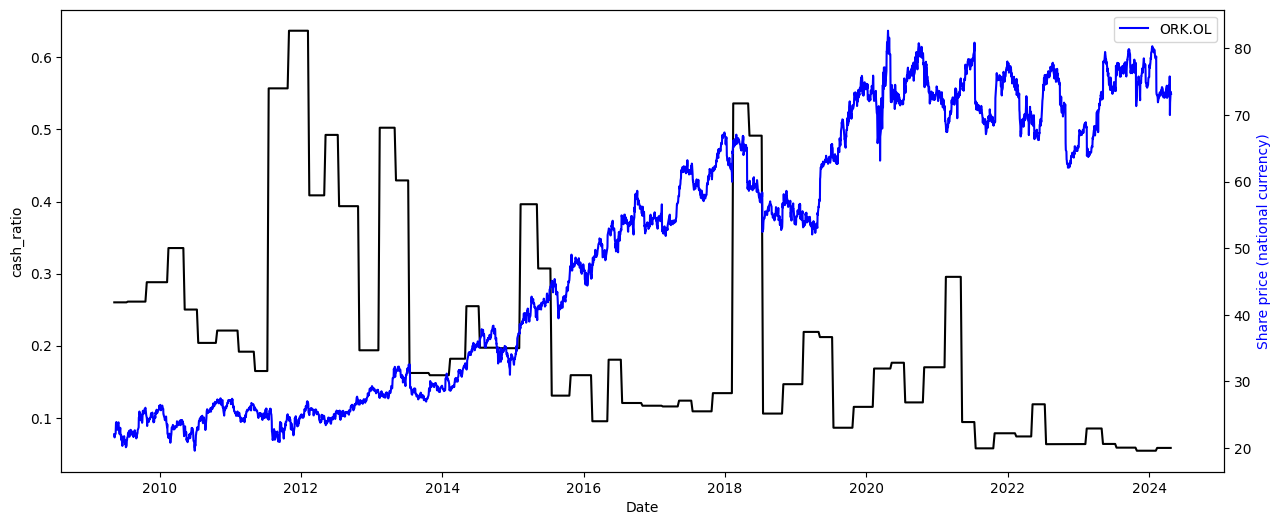

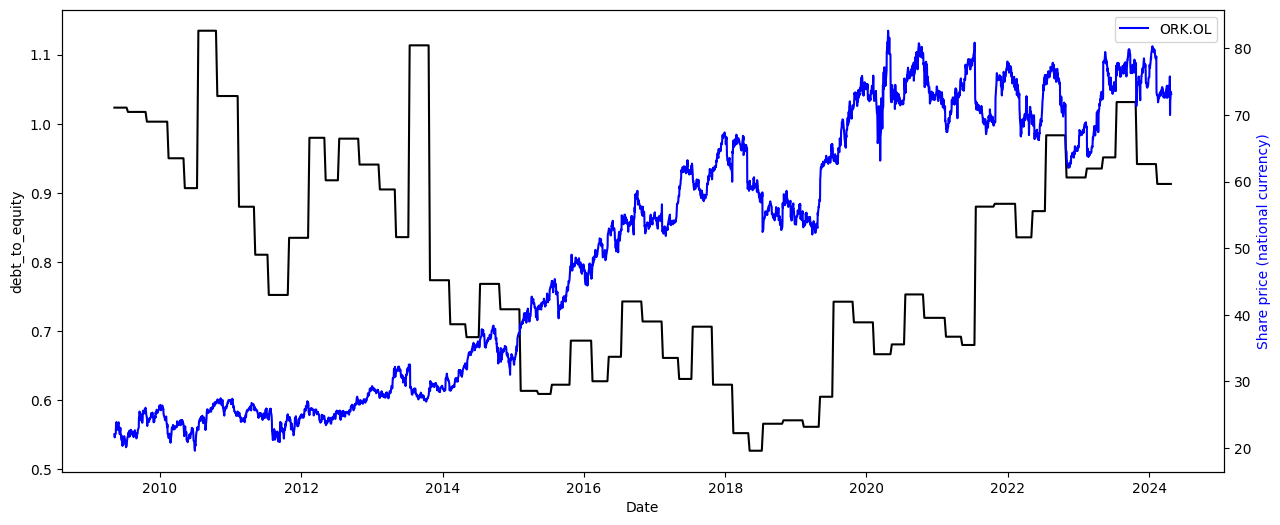

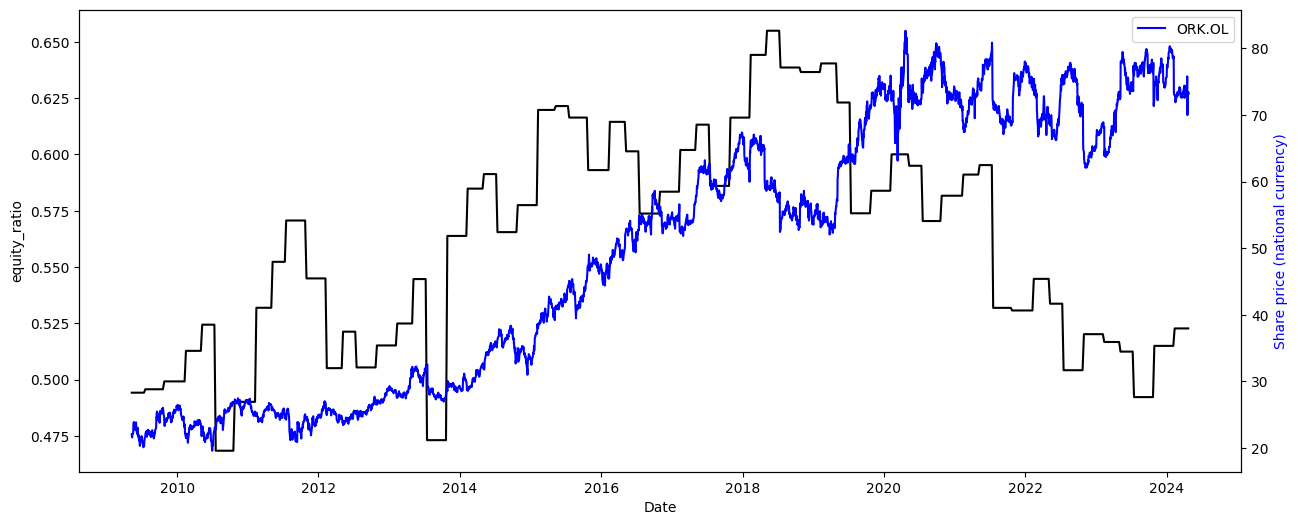

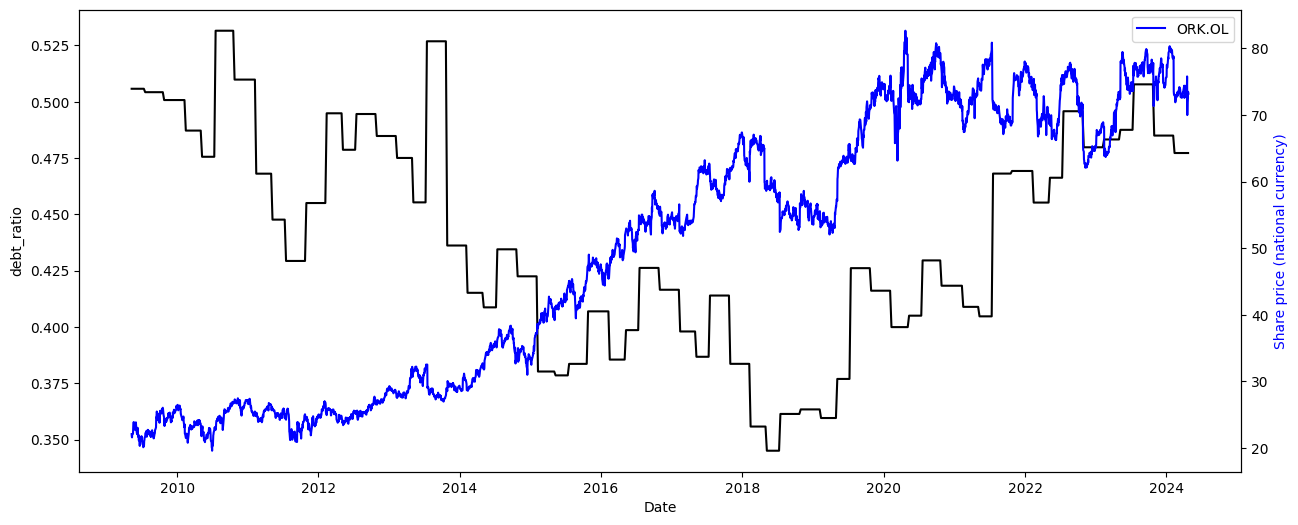

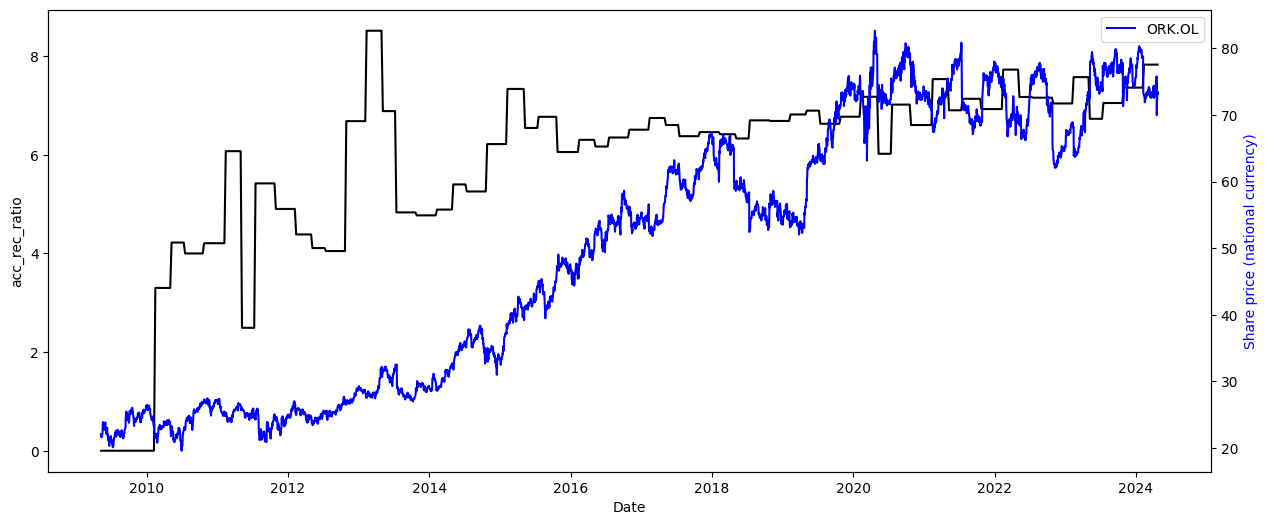

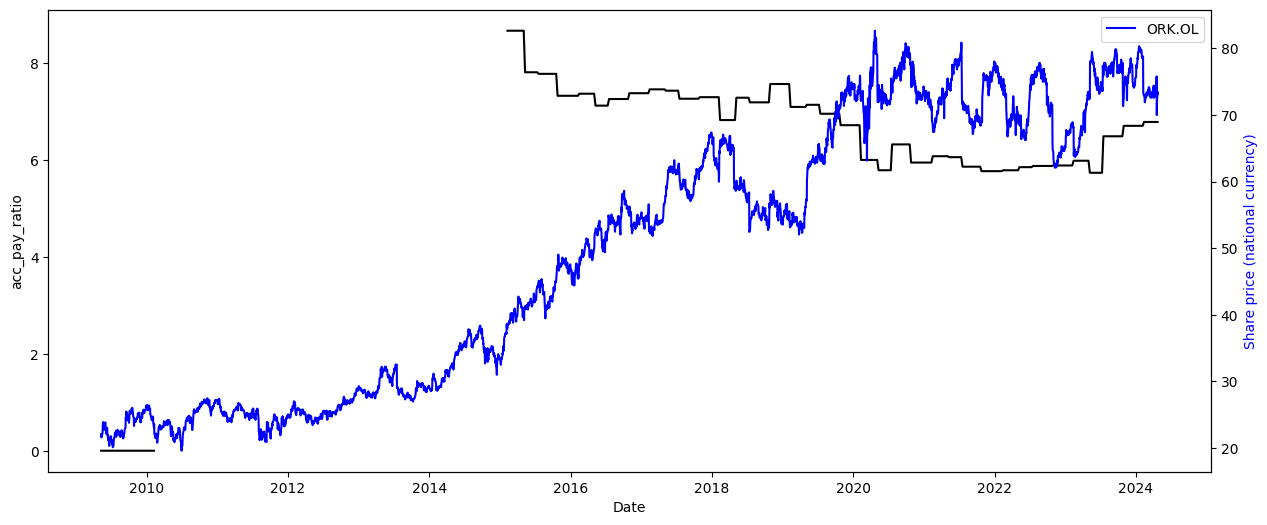

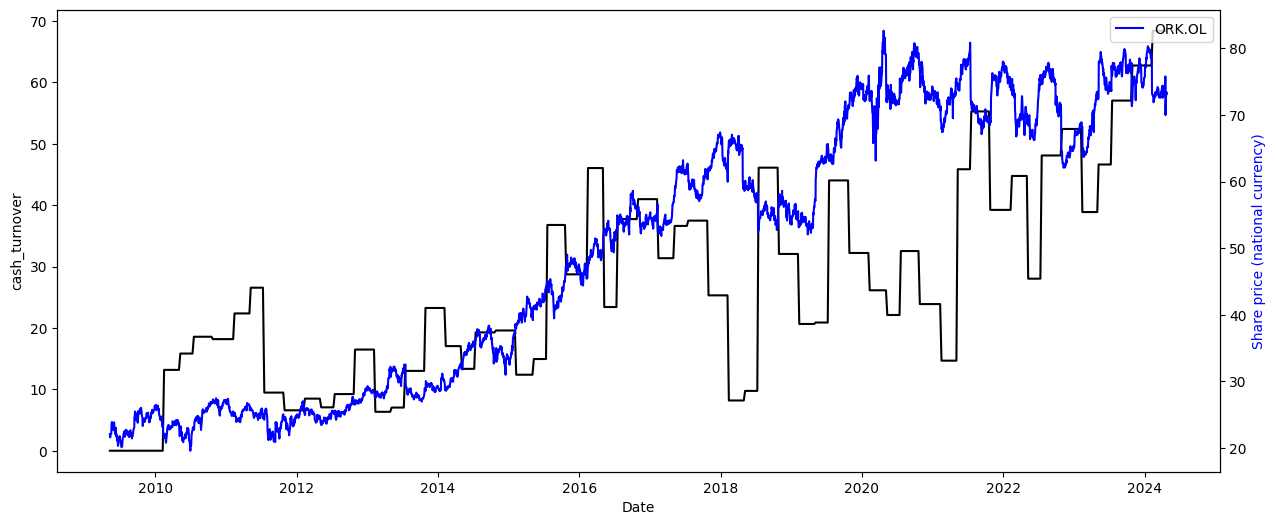

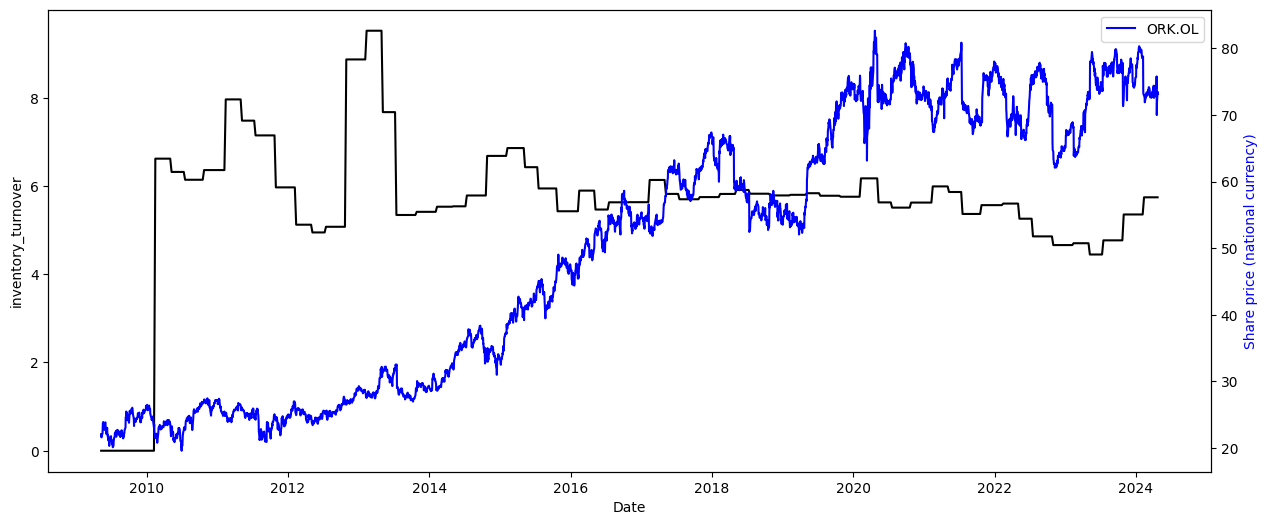

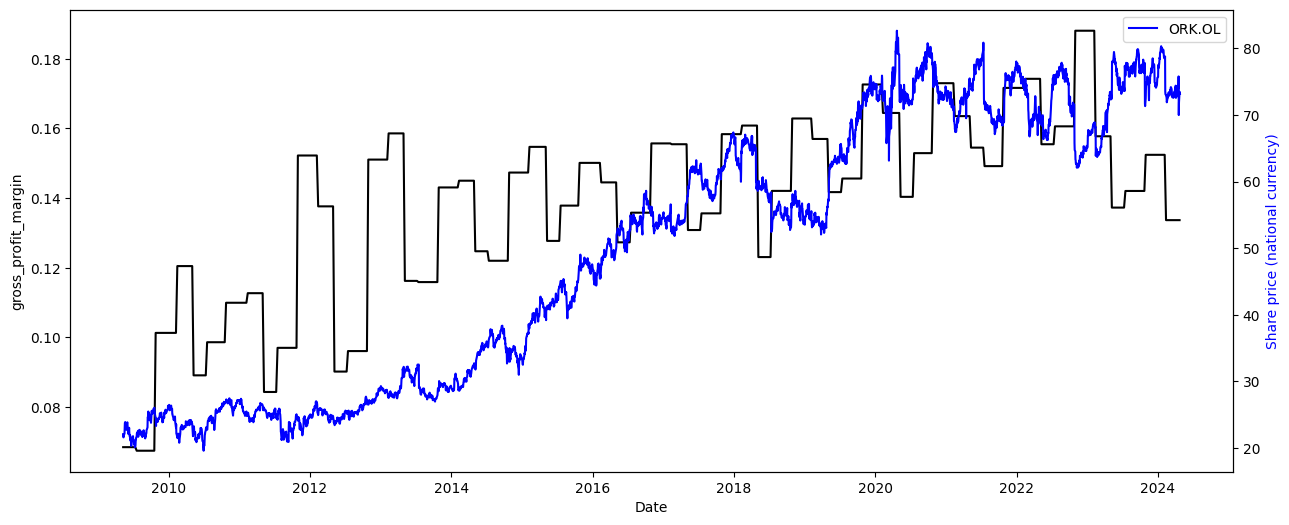

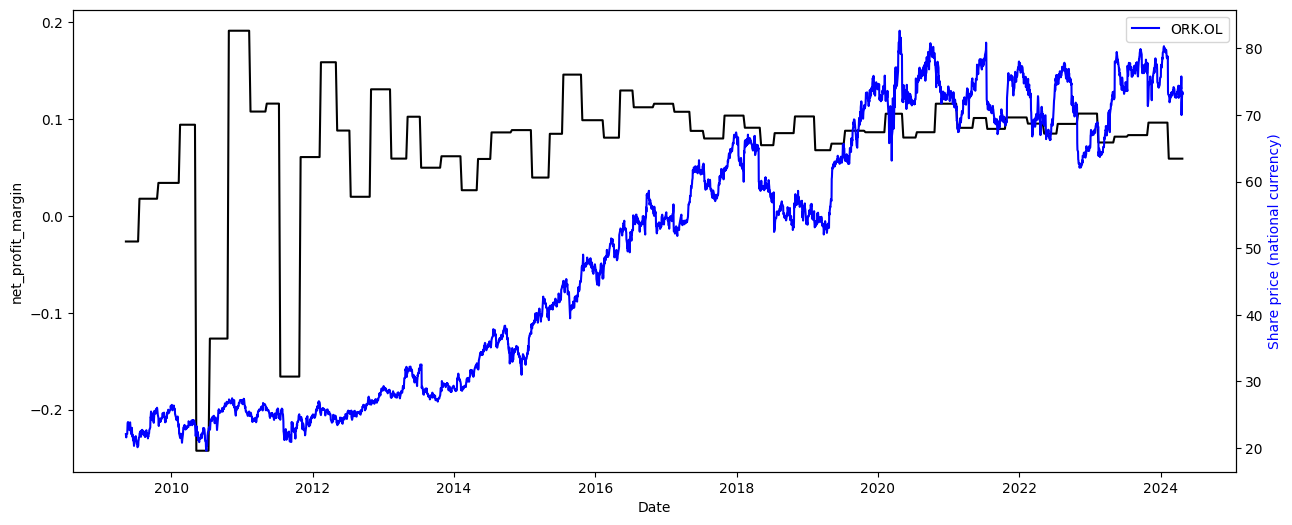

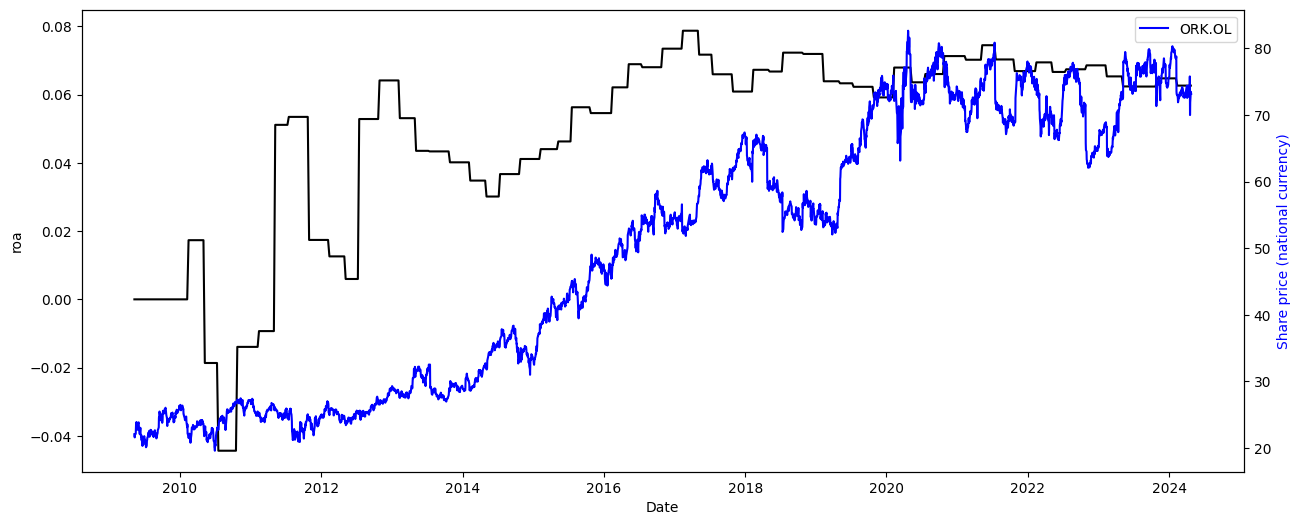

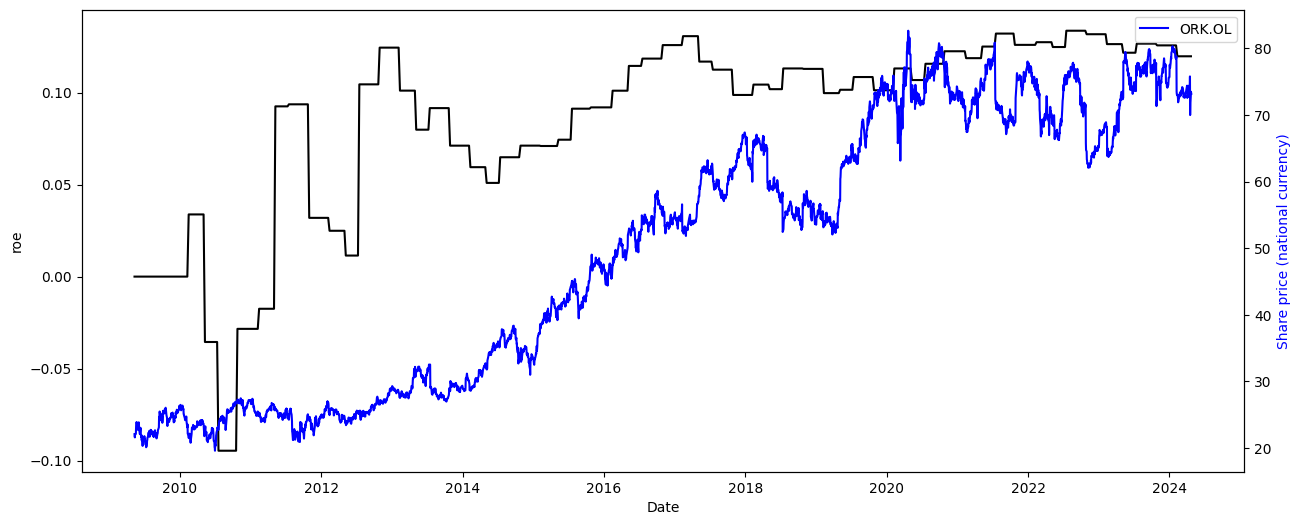

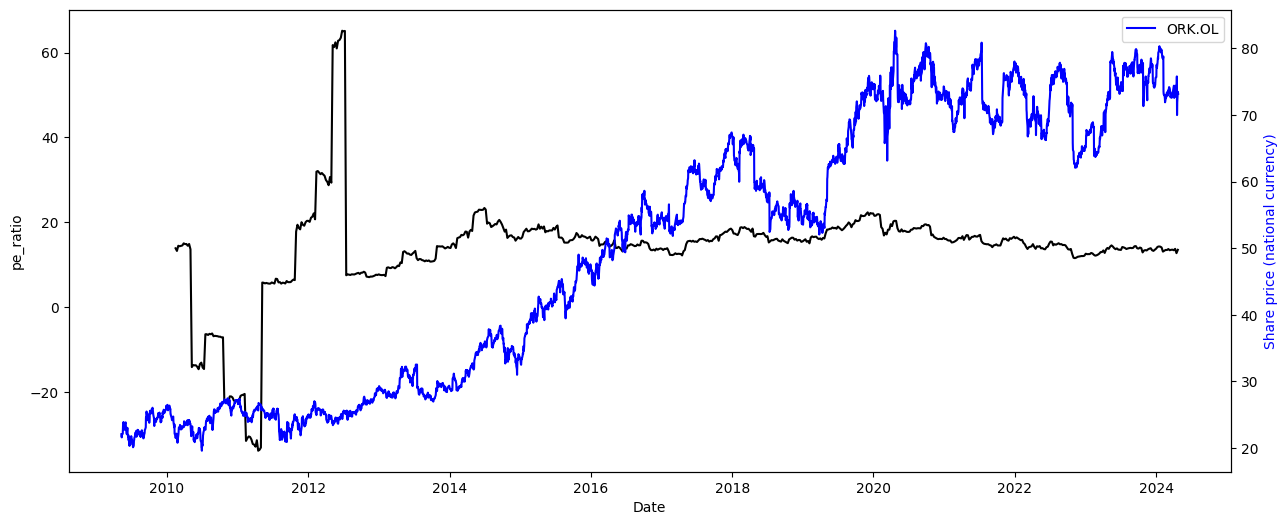

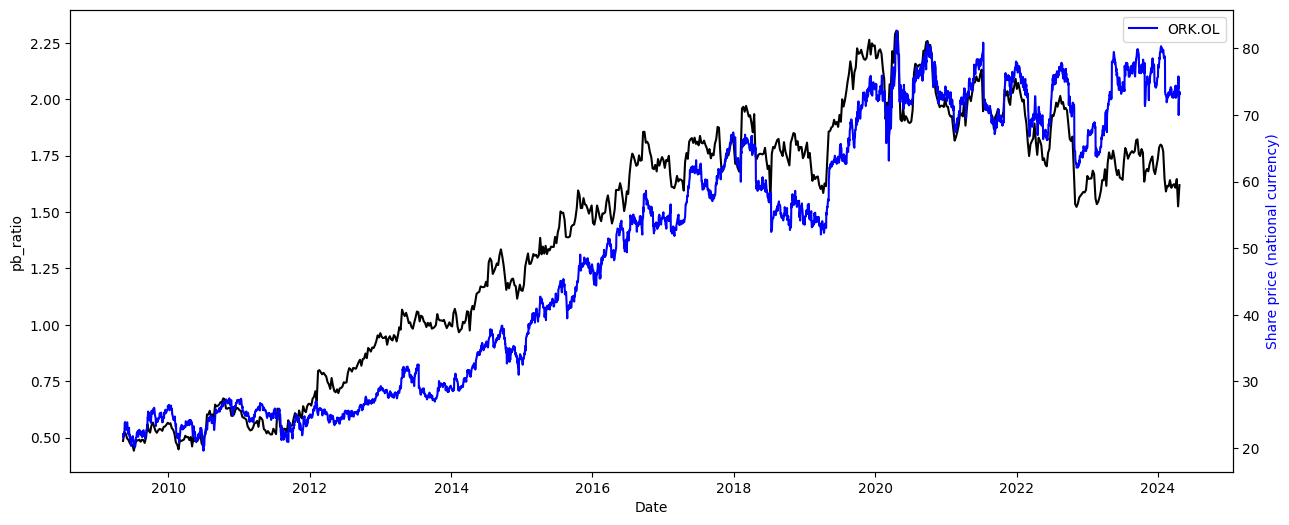

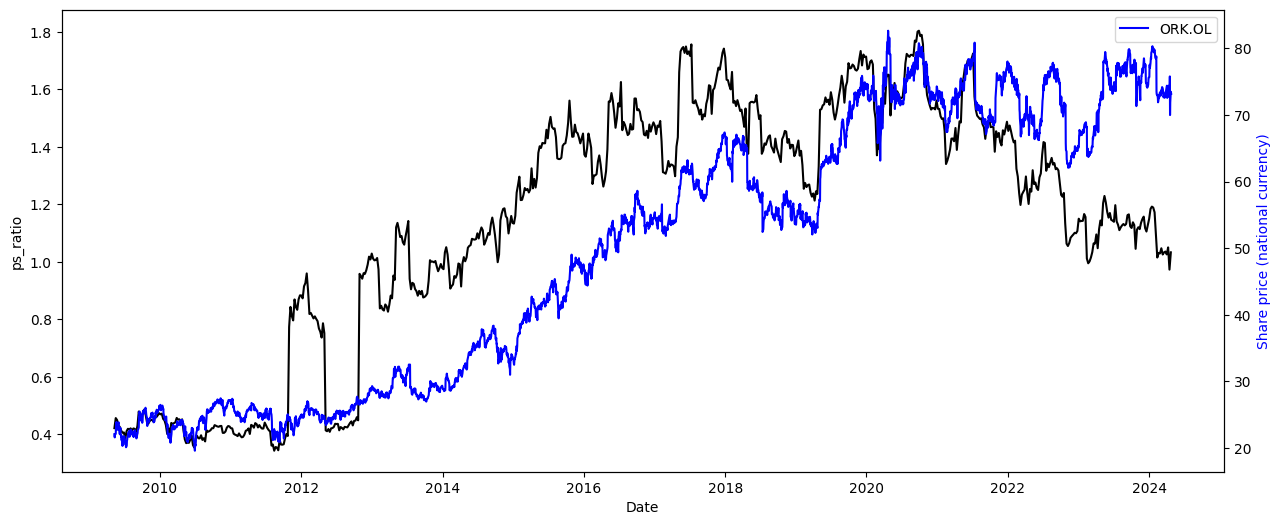

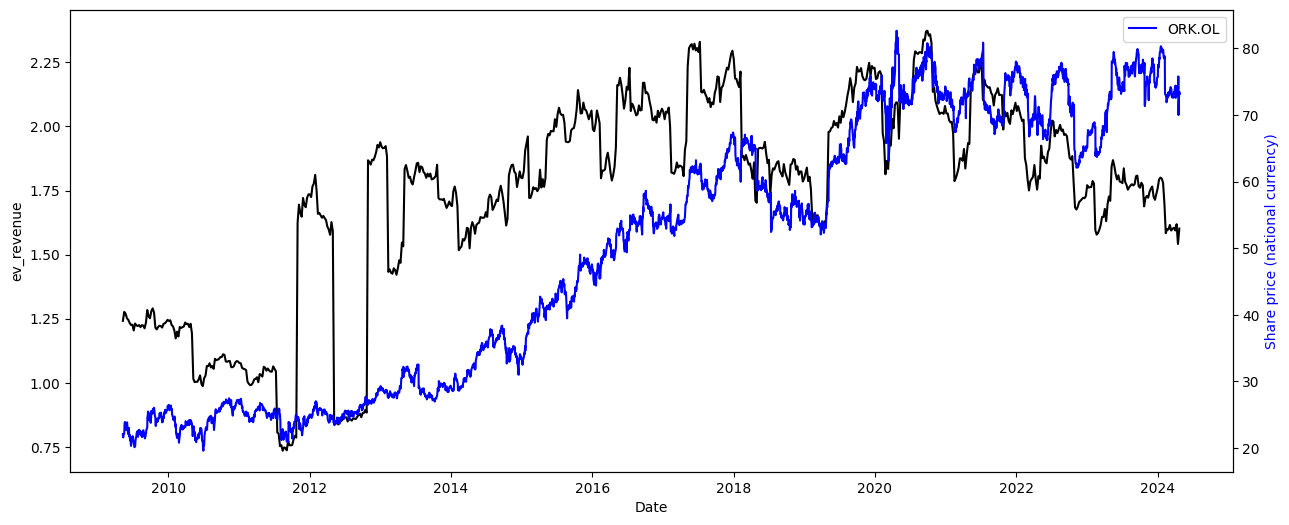

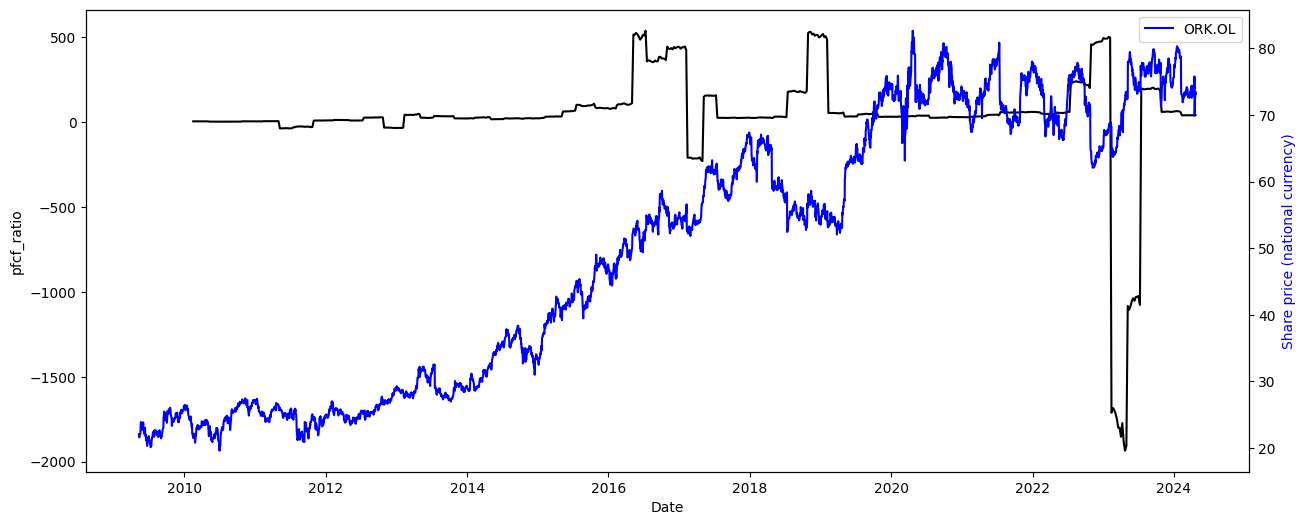

In [18]:
for column in merged_nat_curr.columns[3:]:
    fig, ax1 = plt.subplots(figsize=(15, 6))

    ax2 = ax1.twinx()
    ax1.plot(merged_nat_curr['real_date'], merged_nat_curr[column], color='k', label=merged_nat_curr)
    ax2.plot(ticker_all_price.index, ticker_all_price['Close'], color='b', label=share_name)

    ax1.set_xlabel('Date')
    ax1.set_ylabel(column, color='k')
    ax2.set_ylabel('Share price (national currency)', color='b')

    plt.legend()
    plt.show()

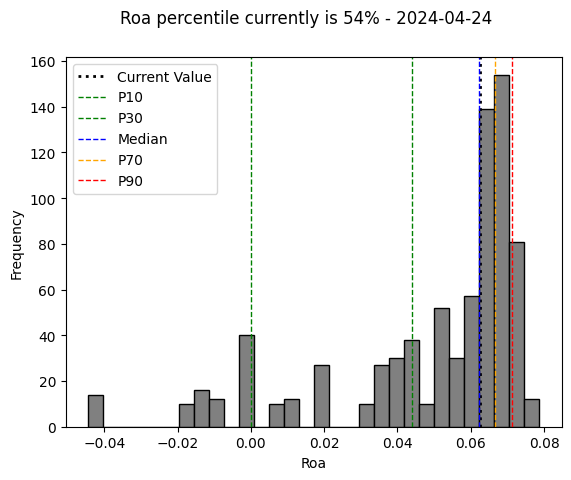

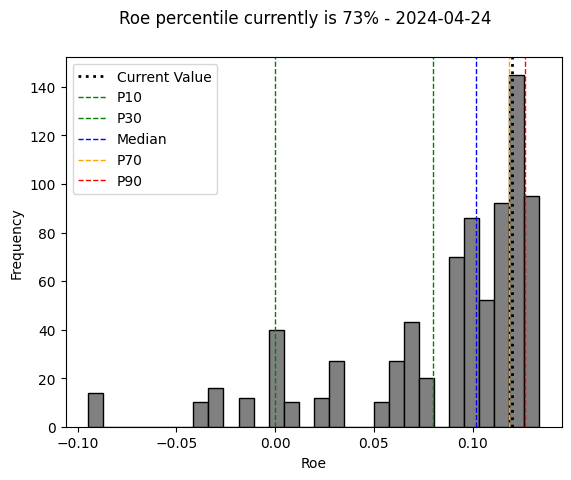

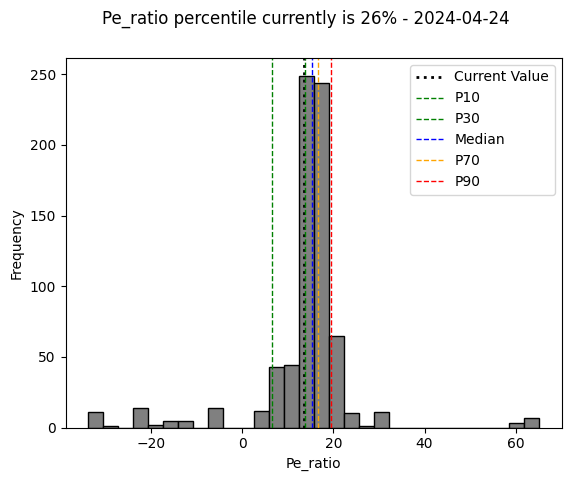

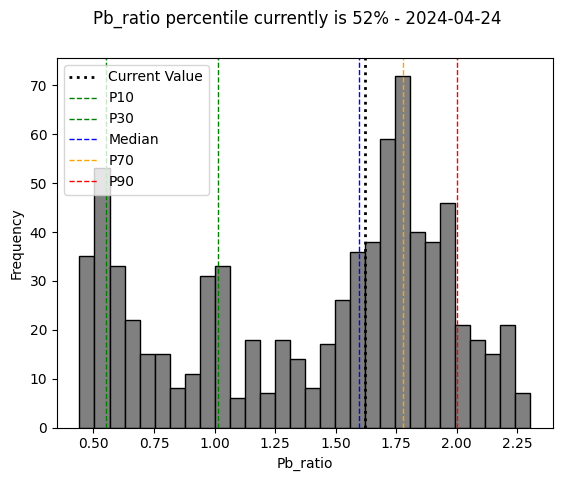

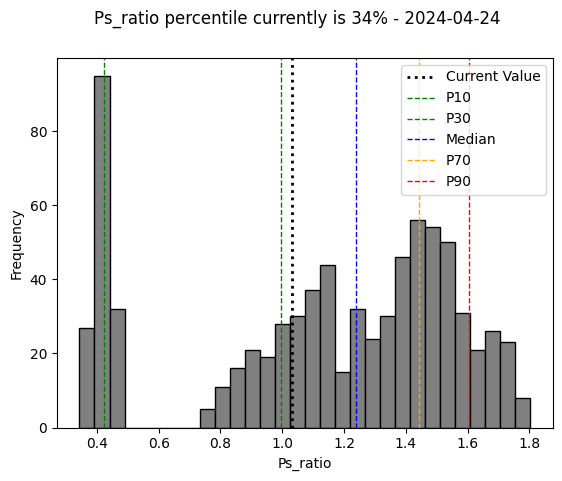

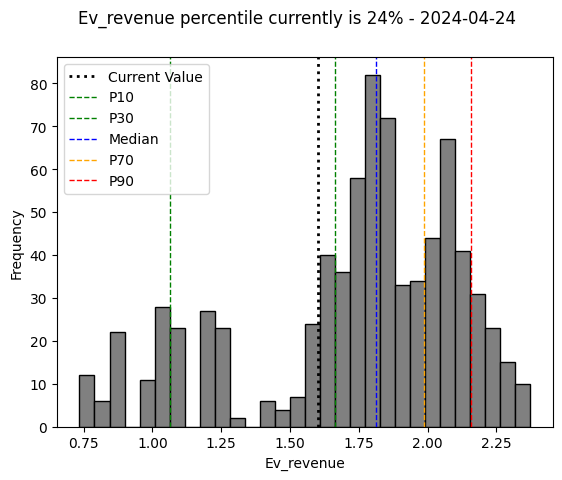

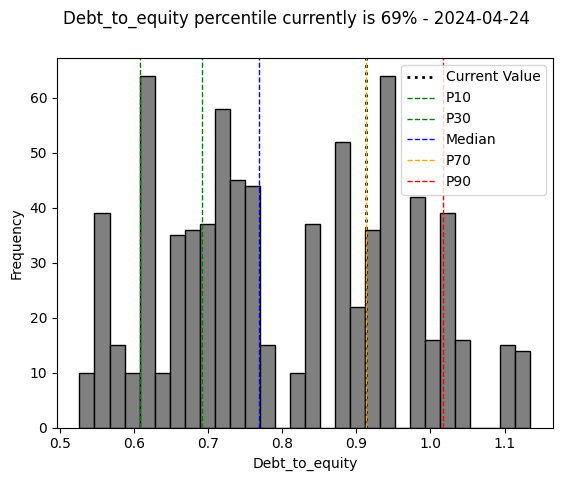

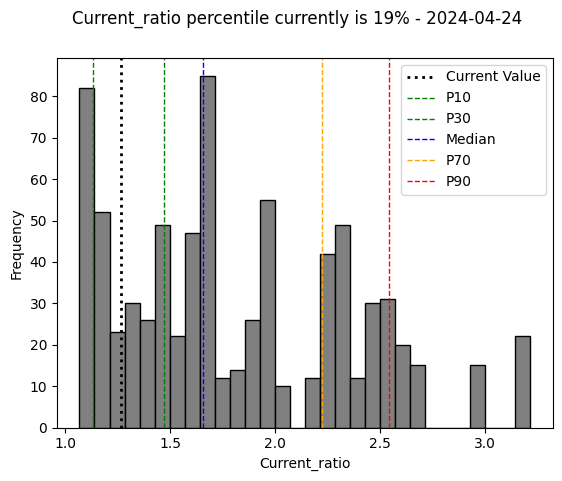

In [19]:
# plot histograms of value parameters
utils.plot_histogram_value_parameters(input_df=merged_nat_curr, extra_parameters=[], owned_shares=owned_shares)

## Calculate correlation between value parameters

In [20]:
# calulate value parameters Pearson's correlation coefficient
pd.DataFrame(merged_nat_curr, columns=['roa', 'roe', 'pe_ratio', 'pb_ratio', 'ps_ratio', 'ev_revenue', 'debt_to_equity', 'current_ratio']).corr()

,roa,roe,pe_ratio,pb_ratio,ps_ratio,ev_revenue,debt_to_equity,current_ratio
roa,1.000000,0.986453,0.409159,0.806459,0.780732,0.694712,-0.539606,-0.593128
roe,0.986453,1.000000,0.394422,0.767747,0.717068,0.656761,-0.409582,-0.606123
pe_ratio,0.409159,0.394422,1.000000,0.369121,0.424530,0.390382,-0.316973,-0.258013
pb_ratio,0.806459,0.767747,0.369121,1.000000,0.925942,0.836762,-0.507583,-0.798537
ps_ratio,0.780732,0.717068,0.424530,0.925942,1.000000,0.952499,-0.672066,-0.651832
ev_revenue,0.694712,0.656761,0.390382,0.836762,0.952499,1.000000,-0.506289,-0.611278
debt_to_equity,-0.539606,-0.409582,-0.316973,-0.507583,-0.672066,-0.506289,1.000000,0.187168
current_ratio,-0.593128,-0.606123,-0.258013,-0.798537,-0.651832,-0.611278,0.187168,1.000000


105 timestemos have been found!


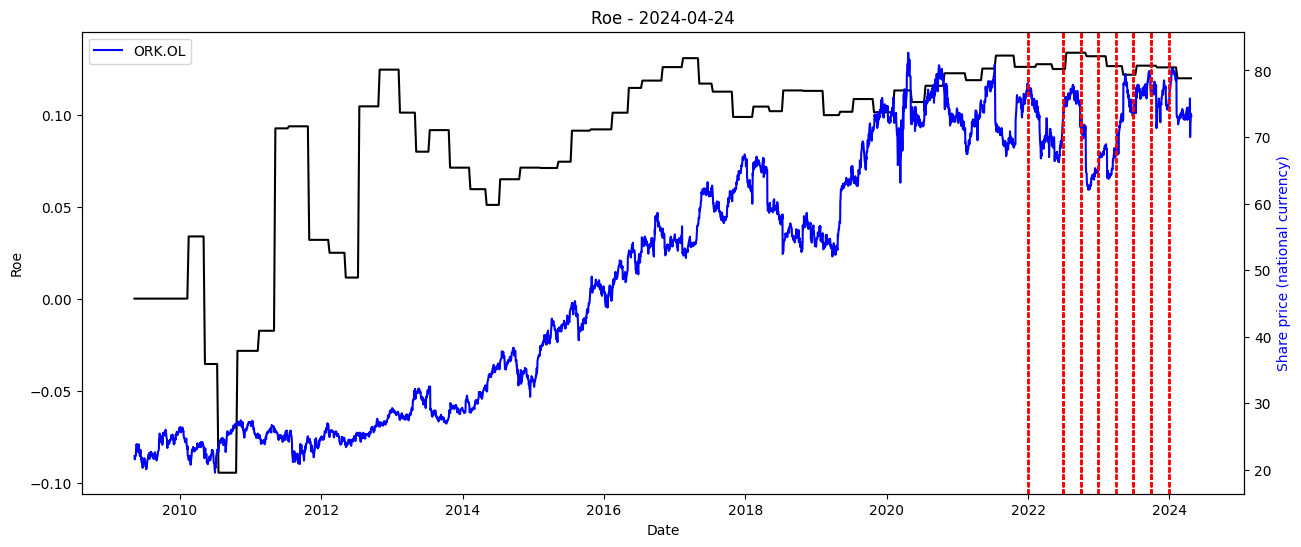

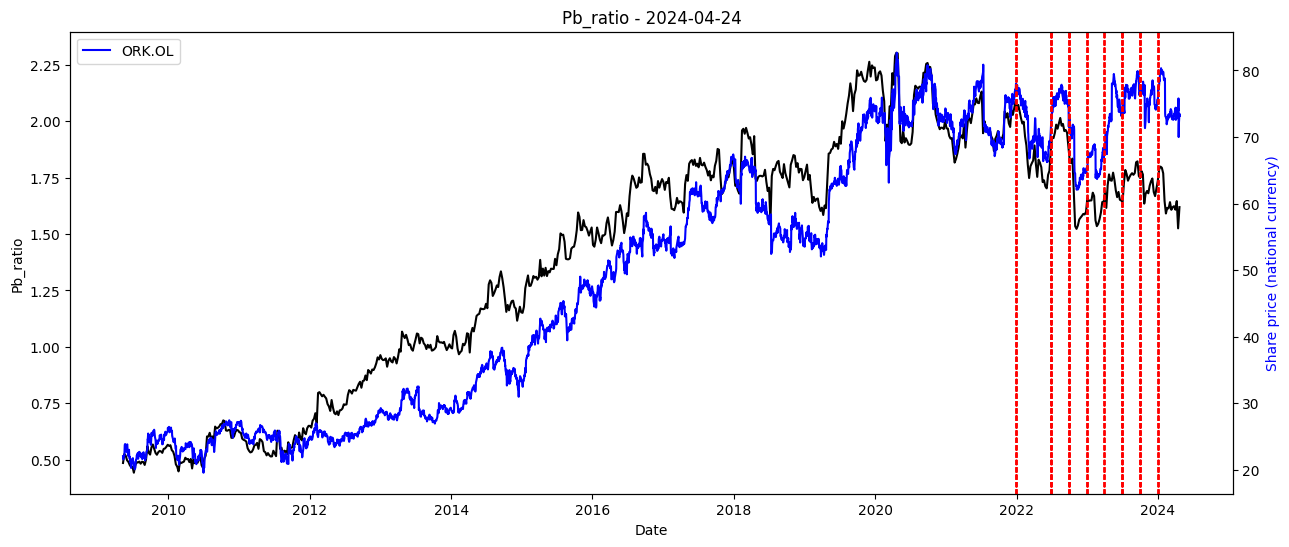

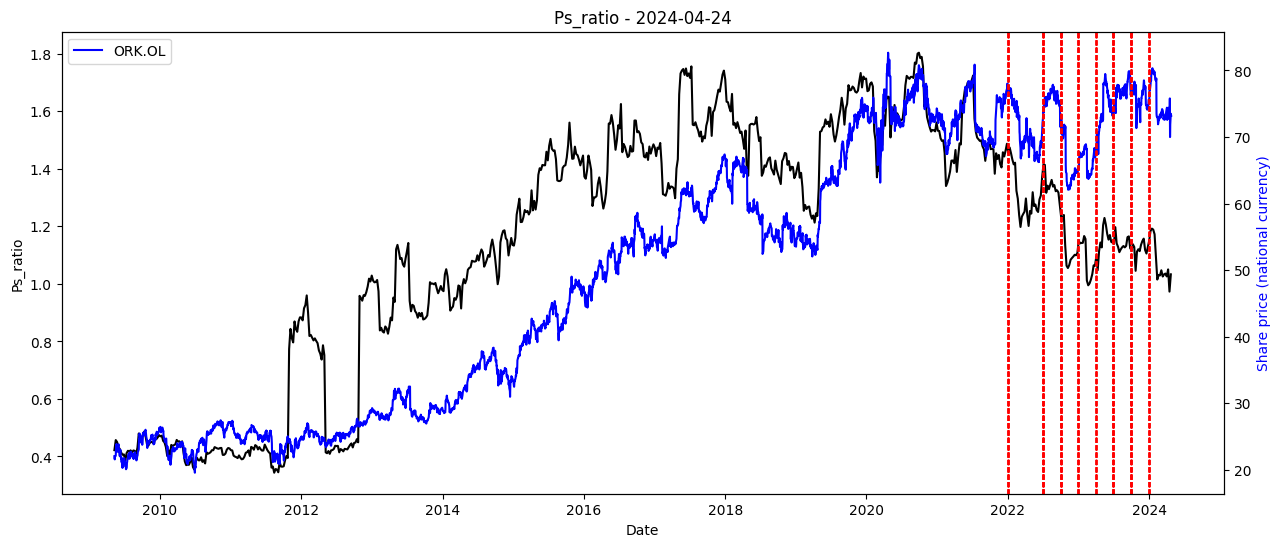

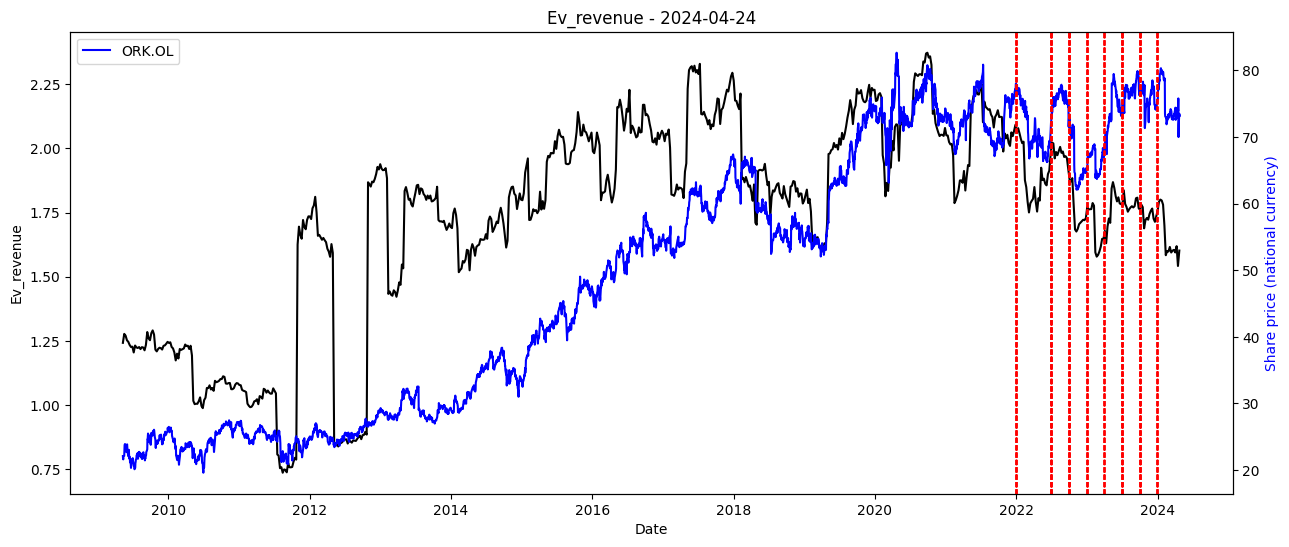

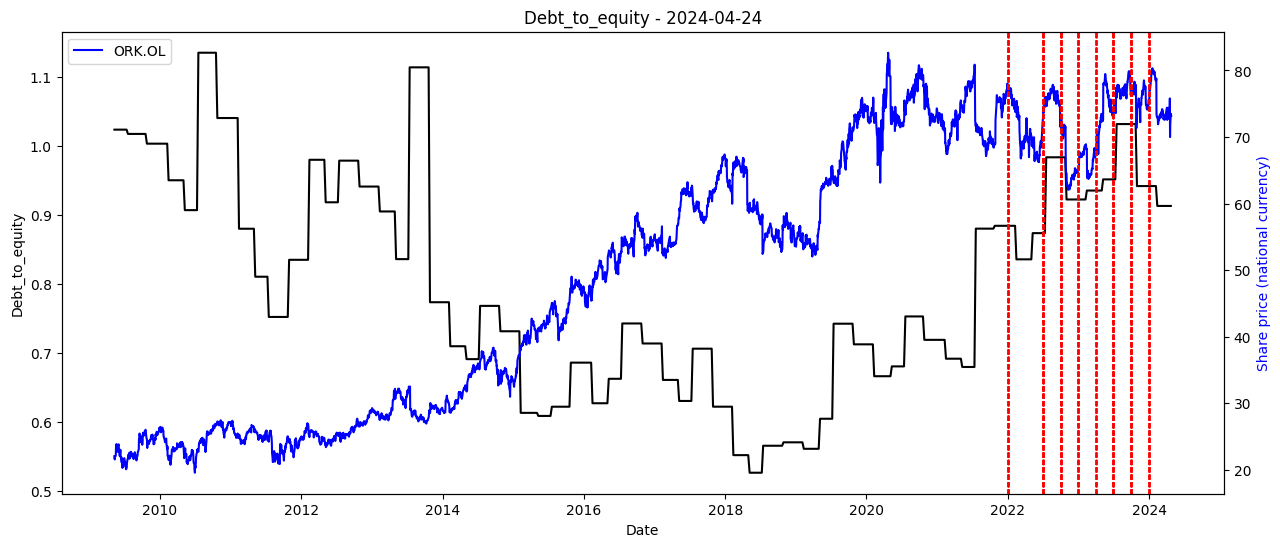

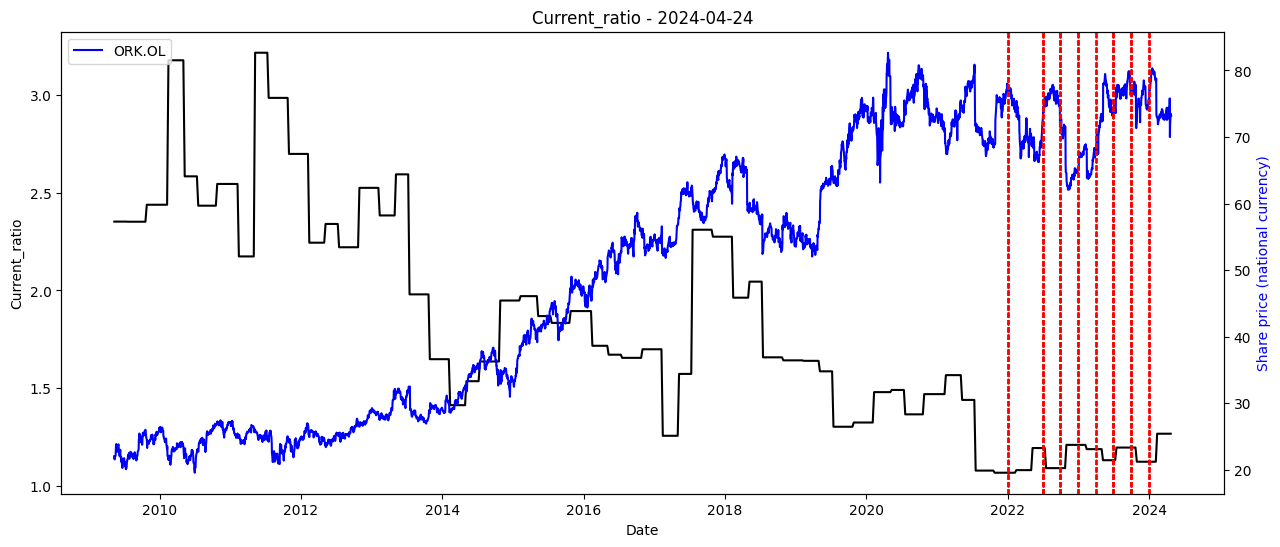

In [21]:
# plot value parameters in time and identify similar events
utils.get_historical_analouges(
    input_df=merged_nat_curr,
    ticker_all_price=ticker_all_price,
    share_name=share_name,
    tolerance=0.2,
    owned_shares=owned_shares
    )